# Homework 1 - Sobel filter

## Theory

To apply a blurring effect to the image, matrices such as this:

$${{1}\over{5}} \begin{bmatrix} 0 & 1 & 0 \\  1 & 1 & 1 \\ 0 & 1 & 1 \end{bmatrix}$$

could be used by applying a _convolution_ operator. Original image is viewed as a original matrix $M$; the other one as a stencil matrix $S$ and its indeces may be negative (for example above, they are $\{-1,0,1\}^2$). Resulting matrix is defined as:

$$conv(M, S)_{i,j} = \sum_k \sum_l M_{i+l,j+k} S_{l,k}$$

I.e., for each pixel of the resulting image, several pixels of the original image are summed with the weights defined by the stensil matrix.

To highlight horizontal edges, the following matrix can ge used:

$$\begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}$$

Similarly, the following matrix highlights vertical edges:

$$\begin{bmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$$

These are Sobel operators $G_x$ and $G_y$, and they calculate gradient of the image intensity function. Their convolutions can be combined to calculate magnitude $G$ of the gradient:

$G = \sqrt{conv(M, G_x)^2 + conv(M, G_y)^2}$

# Pactice

Read an image into a numpy matrix. PIL.Image can be used for this task, as well as any other image processing module.

Display this image.

Text(0.5, 1.0, 'Original image')

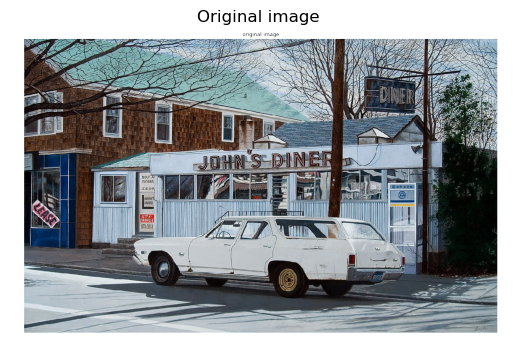

In [1]:
# Initial input

import numpy as np
from scipy import signal
from PIL import Image
from matplotlib import pyplot as plt

img = Image.open("/home/denis/Загрузки/image2.jpg")
img_mat = np.asarray(img)
plt.imshow(img)
plt.axis('off')
plt.title('Original image')

Now, convert the image to a grayscale format. This improves the quality of the final image.

Next, apply horizontal and vertical Sobel filters via scipy.signal.convolve2d. Combine the results into a single magnitude matrix.

Display results in a 2x2 grid.

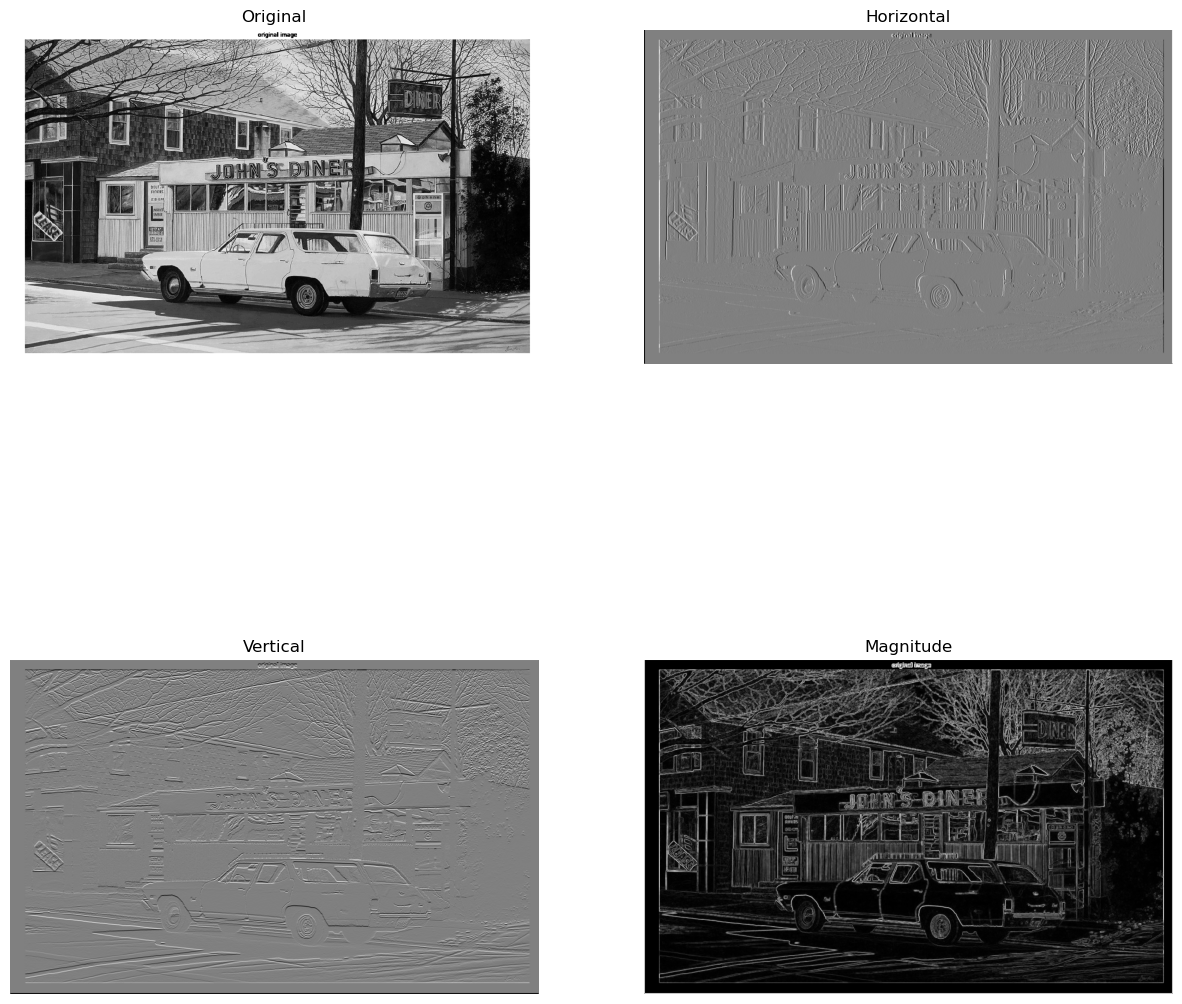

In [8]:
# Convert to grayscale

grayscale = img.convert("L")

# Apply Sobel filters

Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

conv_x = signal.convolve2d(grayscale, Gx)       
conv_y = signal.convolve2d(grayscale, Gy)

# Calculate gradient magnitude

magnitude = np.sqrt(conv_x ** 2 + conv_y ** 2)

# Show results

fig, axs = plt.subplots(2, 2, figsize = (15, 15))

axs[0, 0].imshow(grayscale, cmap = "gray")
axs[0, 1].imshow(conv_x, cmap = "gray")
axs[1, 0].imshow(conv_y, cmap = "gray")
axs[1, 1].imshow(magnitude, cmap = "gray")

for ax in axs.ravel():
    ax.axis('off')
    
axs[0, 0].set_title("Original")
axs[0, 1].set_title("Horizontal")
axs[1, 0].set_title("Vertical")
axs[1, 1].set_title("Magnitude")

plt.show()

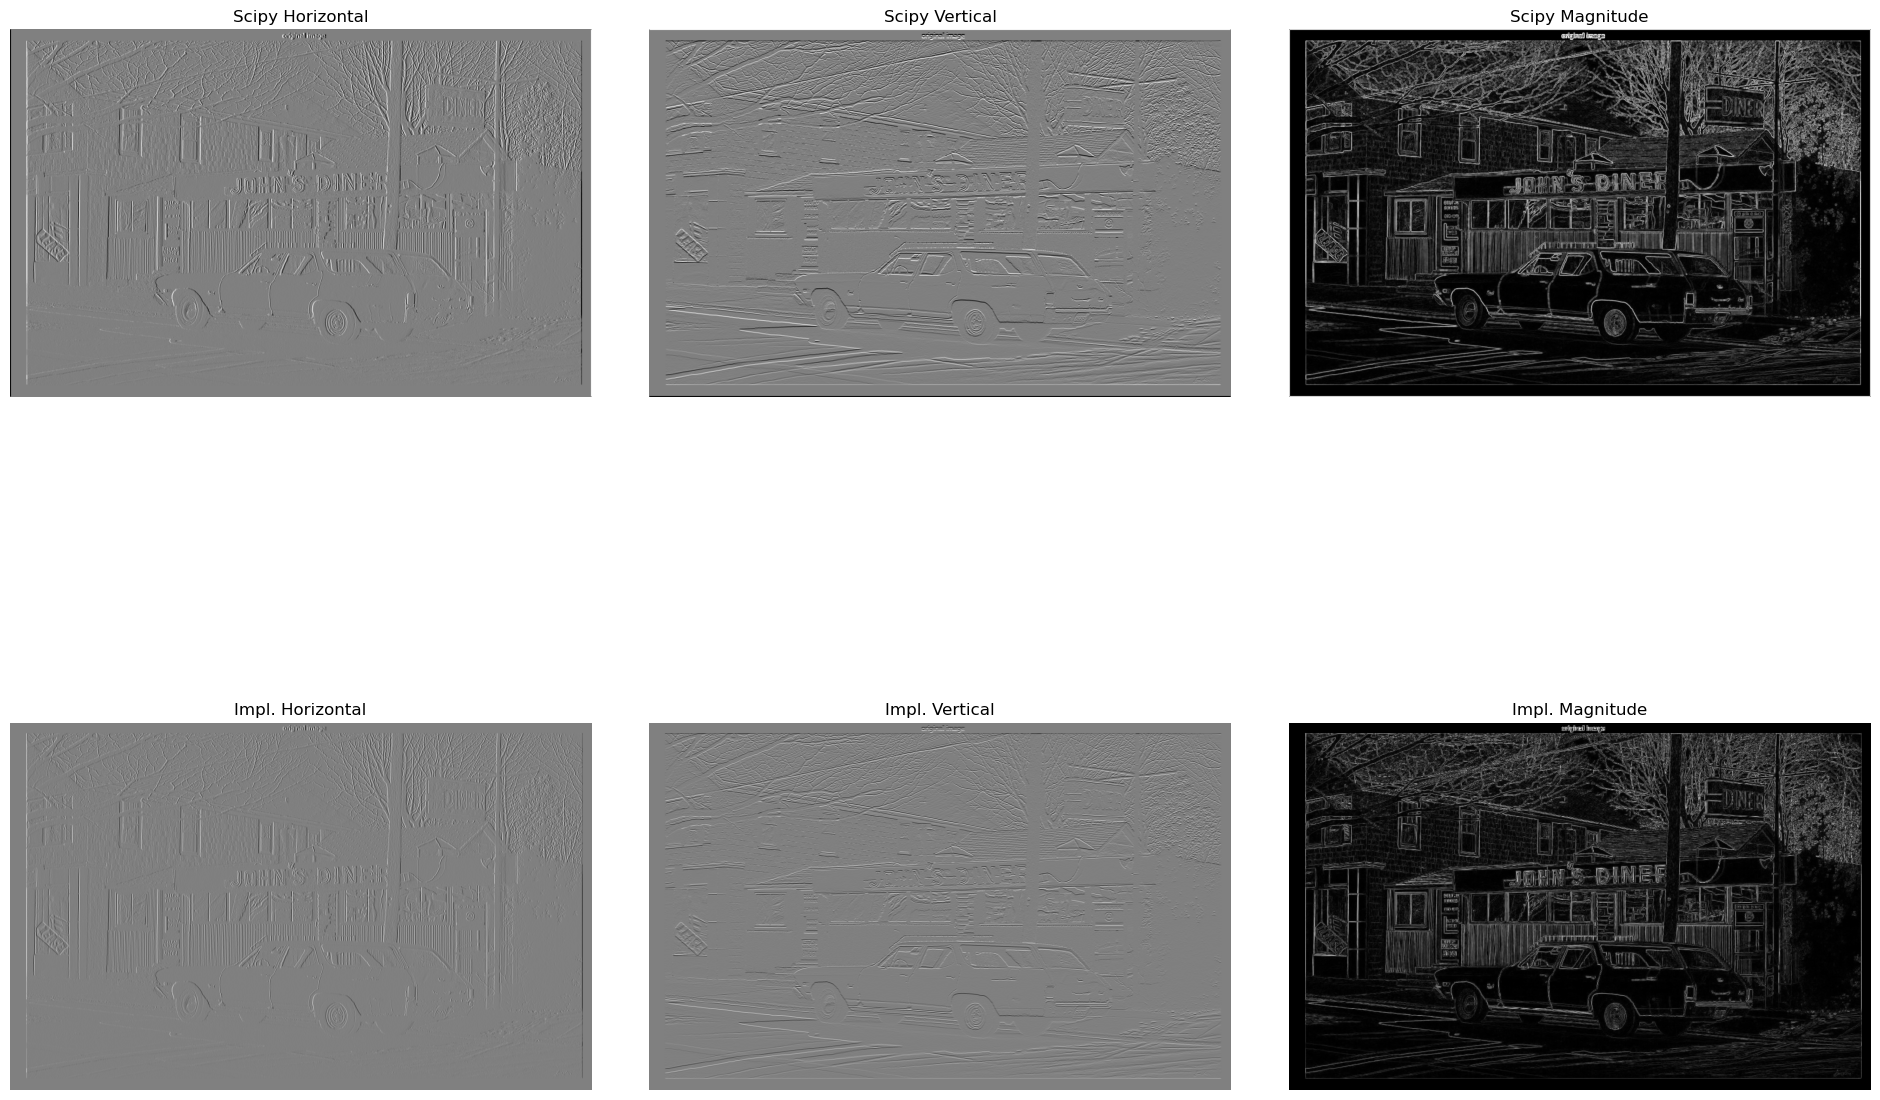

In [34]:
def convolution(M, S):

    my_conv_mat = np.zeros((len(M), len(M[0])), dtype = int)
    
    for i in range (len(M) - 1):
        for j in range (len(M[i]) - 1):
            for l in [-1, 0, 1]:
                for k in [-1, 0, 1]:
                    my_conv_mat[i][j] += M[i+l][j+k] * S[l][k]
    return my_conv_mat
# Repeat calculations and display results, compare performance

grayscale = np.asarray(grayscale)

Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

my_conv_x = convolution(grayscale, Gx)       
my_conv_y = convolution(grayscale, Gy)

my_magnitude = np.sqrt(my_conv_x ** 2 + my_conv_y ** 2)

fig, axs = plt.subplots(2, 3, figsize = (24, 24))

axs[0, 0].imshow(conv_x, cmap = "gray")
axs[0, 1].imshow(conv_y, cmap = "gray")
axs[0, 2].imshow(magnitude, cmap = "gray")
axs[1, 0].imshow(my_conv_x, cmap = "gray")
axs[1, 1].imshow(my_conv_y, cmap = "gray")
axs[1, 2].imshow(my_magnitude, cmap = "gray")

for ax in axs.ravel():
    ax.axis('off')
    
axs[0, 0].set_title("Scipy Horizontal")
axs[0, 1].set_title("Scipy Vertical")
axs[0, 2].set_title("Scipy Magnitude")
axs[1, 0].set_title("Impl. Horizontal")
axs[1, 1].set_title("Impl. Vertical")
axs[1, 2].set_title("Impl. Magnitude")

plt.subplots_adjust(wspace = 0.1, hspace = -0.4)

plt.show()

Finally, implement your own convolution function. Try to optimize performance and readability; this is the main point of the exercise.